# Package import

In [1]:
from models import *
from evaluate import *
from preprocessing import *

# Data load

In [6]:

# stock data
AAPL = pd.read_csv('../data/AAPL.csv')


In [ ]:

# index data
SP500 = pd.read_csv('../data/SP500.csv')
DOLLAR = pd.read_csv('../data/DOLLAR.csv')
NASDAQ = pd.read_csv('../data/NASDAQ.csv')

# noise data
noise = pd.read_csv('../data/noise_data.csv')

In [4]:
params = {"test1": 1,
          "test2": 2}

def func(**params):
    print(params['test1'])

func(**params)

1


# Data preprocessing

In [3]:
# stock data
X_seq_train_stock, y_seq_train_stock, X_seq_test_stock, y_seq_test_stock, scaler = \
    stock_preprocessing(AAPL, window_size=7, future_step=1, split_date='2023-08-01')


# index data
# SP500
X_seq_train_sp500, X_seq_test_sp500 = \
    preprocessing_index_noise(SP500, window_size=7, future_step=1, split_date='2023-08-01', data_type='index')

# DOLLAR
X_seq_train_dollar, X_seq_test_dollar = \
    preprocessing_index_noise(DOLLAR, window_size=7, future_step=1, split_date='2023-08-01', data_type='index')

# NASDAQ
X_seq_train_nasdaq, X_seq_test_nasdaq = \
    preprocessing_index_noise(NASDAQ, window_size=7, future_step=1, split_date='2023-08-01', data_type='index')

# data concatenation
X_seq_train_index = np.concatenate((X_seq_train_sp500, X_seq_train_dollar, X_seq_train_nasdaq), axis=1)
X_seq_test_index = np.concatenate((X_seq_test_sp500, X_seq_test_dollar, X_seq_test_nasdaq), axis=1)


# noise data
X_seq_train_noise, X_seq_test_noise = preprocessing_index_noise(noise, window_size=7, future_step=1, data_type='noise')

# Model_hyperparameter config

In [4]:
class Config:
    def __init__(self, seed=1111, validation_split=0.2, verbose=2, epochs=100, batch_size=32, learning_rate=0.001, 
                 lstm_node1=64, lstm_node2=32, drop_out_rate=0.5):
        # train
        self.validation_split = validation_split
        self.verbose = verbose
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate

        # model
        self.lstm_node1 = lstm_node1
        self.lstm_node2 = lstm_node2
        self.drop_out_rate = drop_out_rate
        self.seed = seed

# Dataframe for score-compare

In [5]:
result = pd.DataFrame(columns=['MSE', 'MAPE'], index=['stock', 'stock+index', 'stock+noise', 'stock+index+noise'])
result

,MSE,MAPE
stock,NaN,NaN
stock+index,NaN,NaN
stock+noise,NaN,NaN
stock+index+noise,NaN,NaN


# LSTM (only-stock)

In [ ]:
stock_config = Config(epochs=200,
                      batch_size=32,
                      learning_rate=0.0005,
                      lstm_node1=256,
                      lstm_node2=256,
                      drop_out_rate=0.5,
                      seed=1111)

c:\Users\Xenrose\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 64)          │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,393 (122.63 KB)

 Trainable params: 31,393 (122.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70


23/23 - 2s - 87ms/step - loss: 0.2911 - val_loss: 0.1129
Epoch 2/70
23/23 - 0s - 4ms/step - loss: 0.1159 - val_loss: 0.0994
Epoch 3/70
23/23 - 0s - 3ms/step - loss: 0.0845 - val_loss: 0.0723
Epoch 4/70
23/23 - 0s - 3ms/step - loss: 0.0793 - val_loss: 0.0729
Epoch 5/70
23/23 - 0s - 3ms/step - loss: 0.0707 - val_loss: 0.0758
Epoch 6/70
23/23 - 0s - 3ms/step - loss: 0.0622 - val_loss: 0.0428
Epoch 7/70
23/23 - 0s - 3ms/step - loss: 0.0608 - val_loss: 0.0496
Epoch 8/70
23/23 - 0s - 3ms/step - loss: 0.0645 - val_loss: 0.0503
Epoch 9/70
23/23 - 0s - 3ms/step - loss: 0.0690 - val_loss: 0.0445
Epoch 10/70
23/23 - 0s - 3ms/step - loss: 0.0685 - val_loss: 0.0574
Epoch 11/70
23/23 - 0s - 4ms/step - loss: 0.0604 - val_loss: 0.0518
Epoch 12/70
23/23 - 0s - 3ms/step - loss: 0.0688 - val_loss: 0.0606
Epoch 13/70
23/23 - 0s - 3ms/step - loss: 0.0624 - val_loss: 0.0666
Epoch 14/70
23/23 - 0s - 3ms/step - loss: 0.0568 - val_loss: 0.0382
Epoch 15/70
23/23 - 0s - 3ms/step - loss: 0.0602 - val_loss: 0.0444

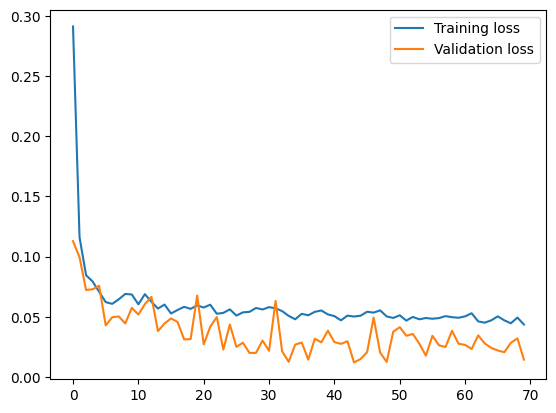

Training loss:  0.04360203072428703
Validation loss:  0.014458706602454185
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


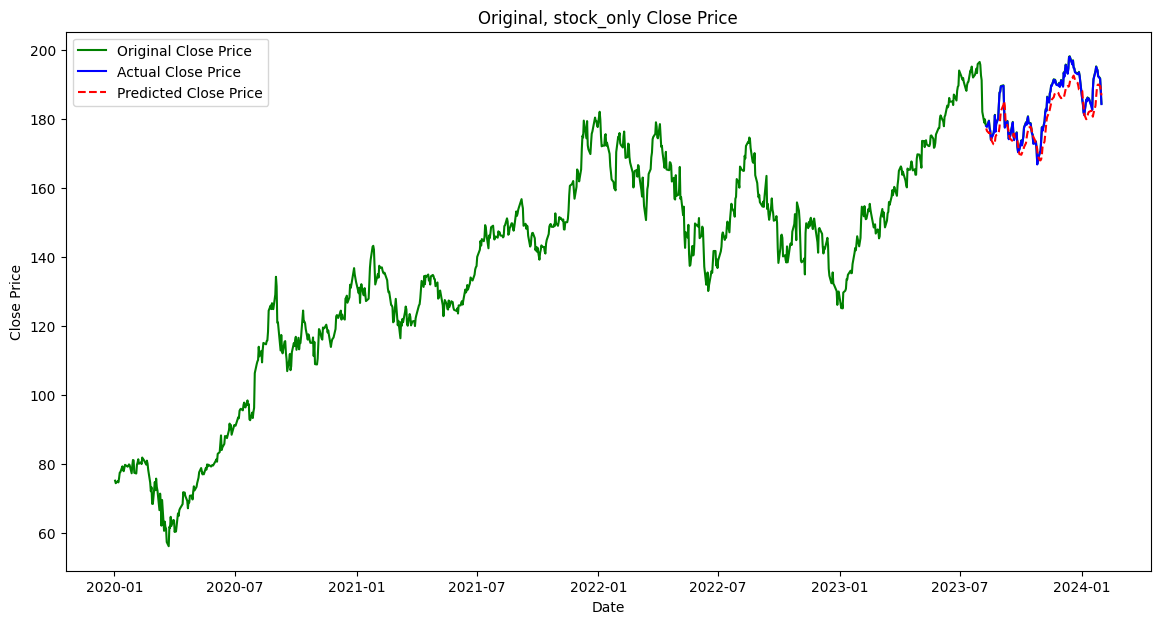

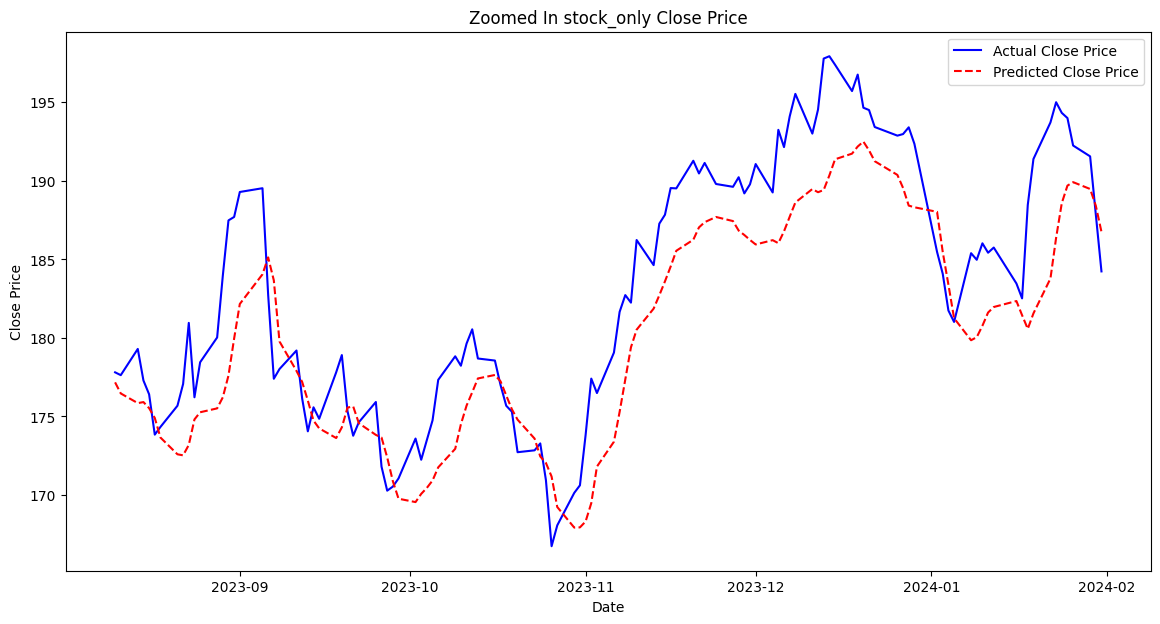

In [8]:
stock_lstm = lstm_model(stock_config, X_seq_train_stock, y_seq_train_stock)
y_pred = stock_lstm.predict(X_seq_test_stock)


y_pred, y_test = unpack_scaled(y_pred, y_seq_test_stock, scaler)


visualize(AAPL, y_pred, y_test, "stock_only")
zoom_visualize(AAPL, y_pred, y_test, "stock_only")

In [9]:
result.loc['stock'] = evaluate_report(y_pred, y_test)

Mean Squared Error:  18.612
Mean Absolute Percentage Error:  0.019


# LSTM (stock + index)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 7, 9)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 21, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 7, 64)     │     18,944 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 21, 64)    │     18,944 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 7, 64)     │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 21, 64)    │          0 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 32)        │     12,416 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 32)        │     12,416 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ dropout_3[0][0],  │
│ (Concatenate)       │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         65 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 62,785 (245.25 KB)

 Trainable params: 62,785 (245.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
23/23 - 3s - 150ms/step - loss: 0.2916 - val_loss: 0.1662
Epoch 2/70
23/23 - 0s - 6ms/step - loss: 0.0913 - val_loss: 0.1393
Epoch 3/70
23/23 - 0s - 6ms/step - loss: 0.0707 - val_loss: 0.1035
Epoch 4/70
23/23 - 0s - 6ms/step - loss: 0.0592 - val_loss: 0.1109
Epoch 5/70
23/23 - 0s - 6ms/step - loss: 0.0601 - val_loss: 0.0821
Epoch 6/70
23/23 - 0s - 6ms/step - loss: 0.0533 - val_loss: 0.0888
Epoch 7/70
23/23 - 0s - 6ms/step - loss: 0.0549 - val_loss: 0.0777
Epoch 8/70
23/23 - 0s - 6ms/step - loss: 0.0559 - val_loss: 0.1274
Epoch 9/70
23/23 - 0s - 6ms/step - loss: 0.0504 - val_loss: 0.0957
Epoch 10/70
23/23 - 0s - 6ms/step - loss: 0.0483 - val_loss: 0.0822
Epoch 11/70
23/23 - 0s - 6ms/step - loss: 0.0479 - val_loss: 0.0836
Epoch 12/70
23/23 - 0s - 6ms/step - loss: 0.0521 - val_loss: 0.1018
Epoch 13/70
23/23 - 0s - 6ms/step - loss: 0.0475 - val_loss: 0.1046
Epoch 14/70
23/23 - 0s - 6ms/step - loss: 0.0434 - val_loss: 0.0858
Epoch 15/70
23/23 - 0s - 6ms/step - loss: 0.0419 - val_

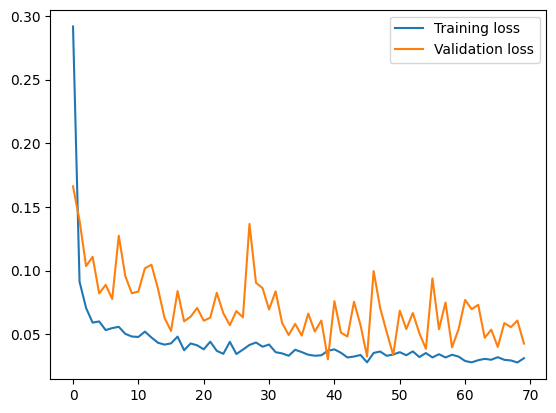

Training loss:  0.03123539313673973
Validation loss:  0.04272303357720375
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


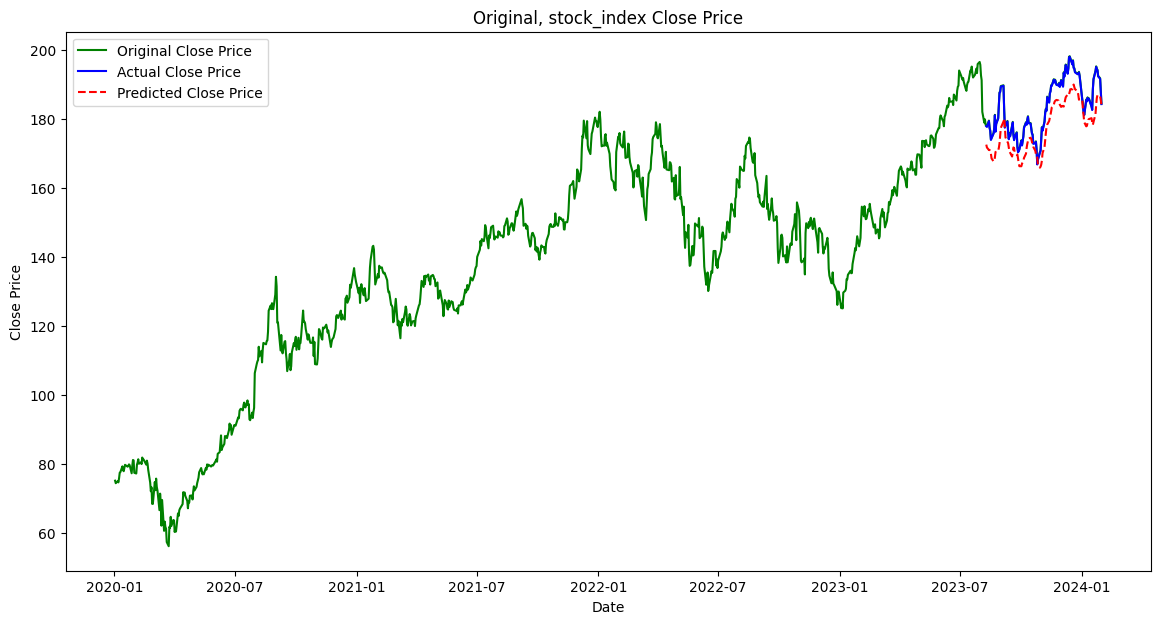

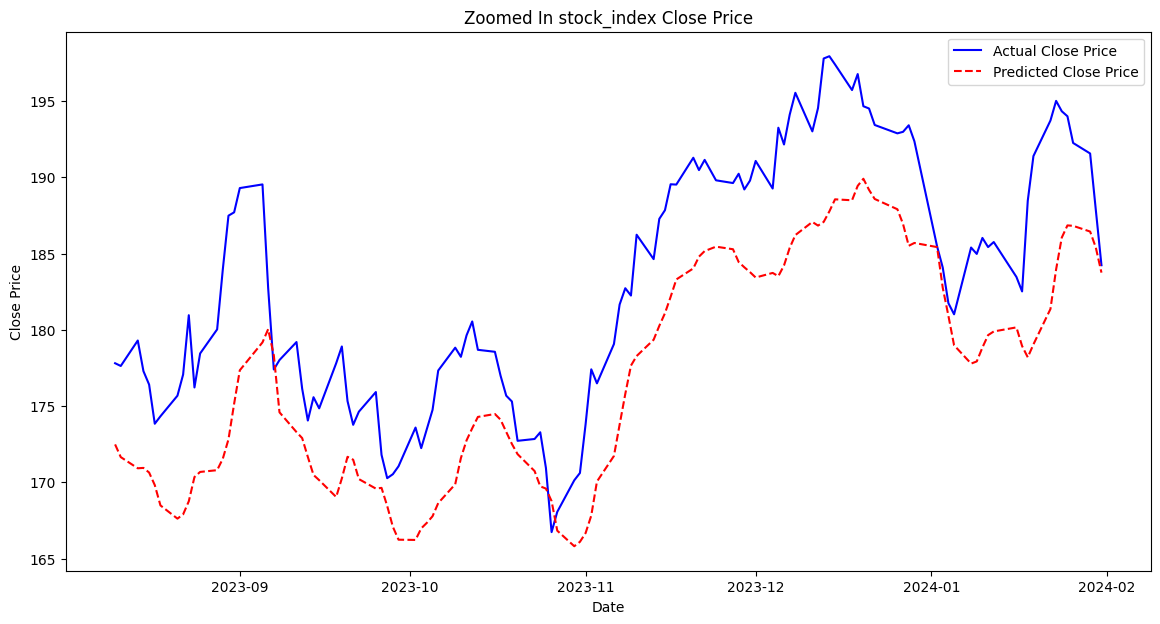

In [11]:
stock_index_lstm = dual_lstm_model(stock_config, X_seq_train_stock, y_seq_train_stock, X_seq_train_index)
y_pred_index = stock_index_lstm.predict((X_seq_test_stock, X_seq_test_index))


y_pred_index, y_test_index = unpack_scaled(y_pred_index, y_seq_test_stock, scaler)


visualize(AAPL, y_pred_index, y_test_index, "stock_index")
zoom_visualize(AAPL, y_pred_index, y_test_index, "stock_index")

In [12]:
result.loc['stock+index'] = evaluate_report(y_pred_index, y_test_index)

Mean Squared Error:  45.96
Mean Absolute Percentage Error:  0.033


# LSTM (stock + noise)

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 7, 9)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 7, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 7, 64)     │     18,944 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 7, 64)     │     19,200 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 7, 64)     │          0 │ lstm_6[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 7, 64)     │          0 │ lstm_8[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 32)        │     12,416 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 32)        │     12,416 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 32)        │          0 │ lstm_7[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 32)        │          0 │ lstm_9[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64)        │          0 │ dropout_7[0][0],  │
│ (Concatenate)       │                   │            │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 63,041 (246.25 KB)

 Trainable params: 63,041 (246.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
23/23 - 4s - 154ms/step - loss: 0.5841 - val_loss: 0.1273
Epoch 2/70
23/23 - 0s - 4ms/step - loss: 0.1322 - val_loss: 0.1511
Epoch 3/70
23/23 - 0s - 4ms/step - loss: 0.0828 - val_loss: 0.0863
Epoch 4/70
23/23 - 0s - 4ms/step - loss: 0.0837 - val_loss: 0.0862
Epoch 5/70
23/23 - 0s - 4ms/step - loss: 0.0789 - val_loss: 0.0822
Epoch 6/70
23/23 - 0s - 4ms/step - loss: 0.0683 - val_loss: 0.0601
Epoch 7/70
23/23 - 0s - 4ms/step - loss: 0.0673 - val_loss: 0.0674
Epoch 8/70
23/23 - 0s - 4ms/step - loss: 0.0675 - val_loss: 0.0651
Epoch 9/70
23/23 - 0s - 4ms/step - loss: 0.0618 - val_loss: 0.0672
Epoch 10/70
23/23 - 0s - 4ms/step - loss: 0.0677 - val_loss: 0.0852
Epoch 11/70
23/23 - 0s - 4ms/step - loss: 0.0688 - val_loss: 0.0484
Epoch 12/70
23/23 - 0s - 4ms/step - loss: 0.0586 - val_loss: 0.0535
Epoch 13/70
23/23 - 0s - 4ms/step - loss: 0.0631 - val_loss: 0.0637
Epoch 14/70
23/23 - 0s - 4ms/step - loss: 0.0614 - val_loss: 0.0579
Epoch 15/70
23/23 - 0s - 4ms/step - loss: 0.0619 - val_

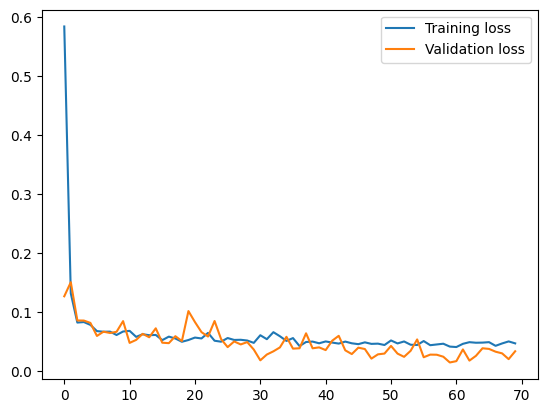

Training loss:  0.047585319727659225
Validation loss:  0.03421945869922638
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001B40BAF3BA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


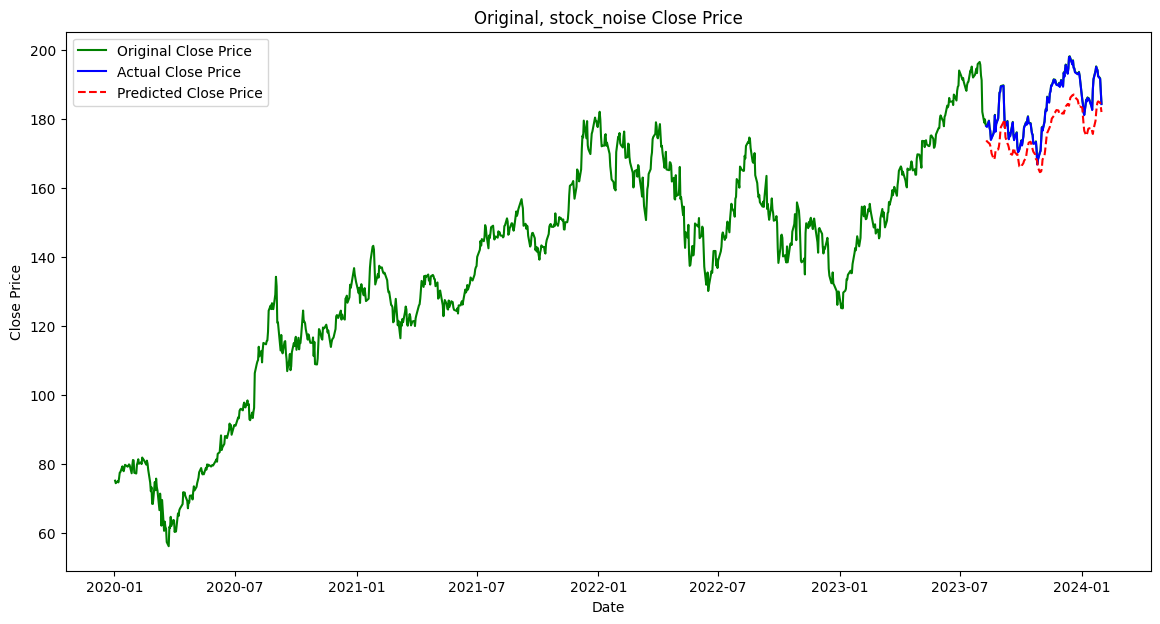

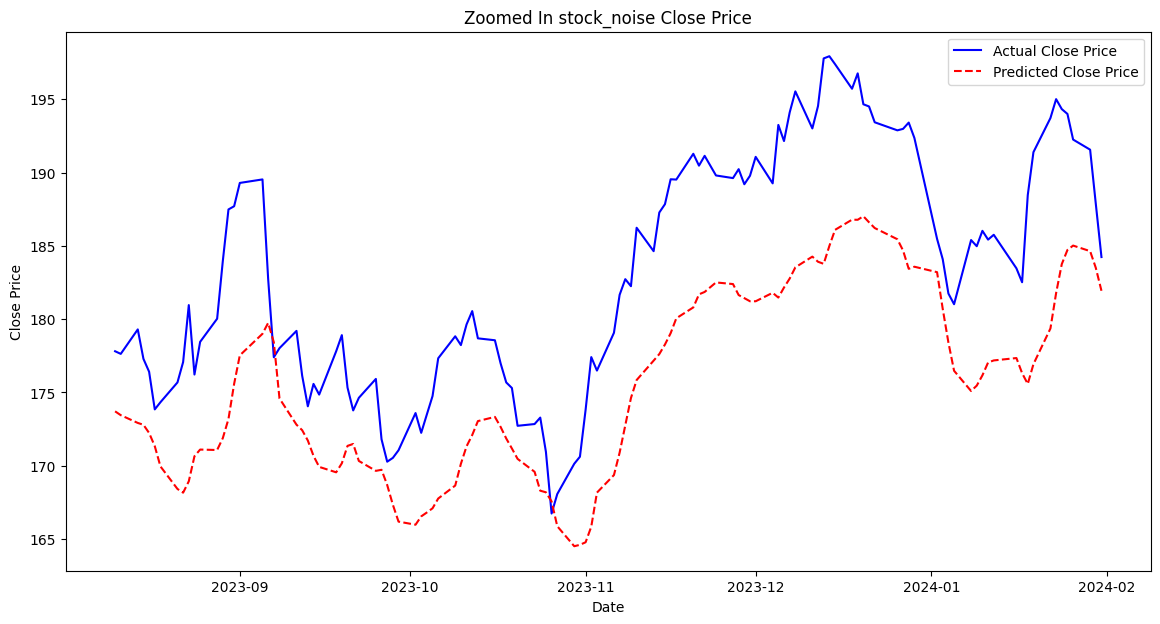

In [14]:
stock_noise_lstm = dual_lstm_model(stock_config, X_seq_train_stock, y_seq_train_stock, X_seq_train_noise)
y_pred_noise = stock_noise_lstm.predict((X_seq_test_stock, X_seq_test_noise))


y_pred_noise, y_test_noise = unpack_scaled(y_pred_noise, y_seq_test_stock, scaler)


visualize(AAPL, y_pred_noise, y_test_noise, "stock_noise")
zoom_visualize(AAPL, y_pred_noise, y_test_noise, "stock_noise")

In [15]:
result.loc['stock+noise'] = evaluate_report(y_pred_noise, y_test_noise)

Mean Squared Error:  66.463
Mean Absolute Percentage Error:  0.04


# LSTM (stock + index + noise)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 7, 9)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 21, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 7, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_10 (LSTM)      │ (None, 7, 64)     │     18,944 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_12 (LSTM)      │ (None, 21, 64)    │     18,944 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_14 (LSTM)      │ (None, 7, 64)     │     19,200 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 7, 64)     │          0 │ lstm_10[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 21, 64)    │          0 │ lstm_12[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 7, 64)     │          0 │ lstm_14[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_11 (LSTM)      │ (None, 32)        │     12,416 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_13 (LSTM)      │ (None, 32)        │     12,416 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_15 (LSTM)      │ (None, 32)        │     12,416 │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32)        │          0 │ lstm_11[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 32)        │          0 │ lstm_13[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 32)        │          0 │ lstm_15[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 96)        │          0 │ dropout_11[0][0], │
│ (Concatenate)       │                   │            │ dropout_13[0][0], │
│                     │                   │            │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         97 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 94,433 (368.88 KB)

 Trainable params: 94,433 (368.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
23/23 - 5s - 231ms/step - loss: 0.3381 - val_loss: 0.1533
Epoch 2/70
23/23 - 0s - 7ms/step - loss: 0.0978 - val_loss: 0.1528
Epoch 3/70
23/23 - 0s - 7ms/step - loss: 0.0754 - val_loss: 0.1467
Epoch 4/70
23/23 - 0s - 7ms/step - loss: 0.0632 - val_loss: 0.1472
Epoch 5/70
23/23 - 0s - 7ms/step - loss: 0.0533 - val_loss: 0.1074
Epoch 6/70
23/23 - 0s - 7ms/step - loss: 0.0540 - val_loss: 0.0827
Epoch 7/70
23/23 - 0s - 7ms/step - loss: 0.0563 - val_loss: 0.0876
Epoch 8/70
23/23 - 0s - 7ms/step - loss: 0.0467 - val_loss: 0.0904
Epoch 9/70
23/23 - 0s - 7ms/step - loss: 0.0473 - val_loss: 0.0692
Epoch 10/70
23/23 - 0s - 7ms/step - loss: 0.0457 - val_loss: 0.0934
Epoch 11/70
23/23 - 0s - 7ms/step - loss: 0.0473 - val_loss: 0.0745
Epoch 12/70
23/23 - 0s - 7ms/step - loss: 0.0427 - val_loss: 0.0662
Epoch 13/70
23/23 - 0s - 7ms/step - loss: 0.0385 - val_loss: 0.0710
Epoch 14/70
23/23 - 0s - 7ms/step - loss: 0.0440 - val_loss: 0.0727
Epoch 15/70
23/23 - 0s - 7ms/step - loss: 0.0439 - val_

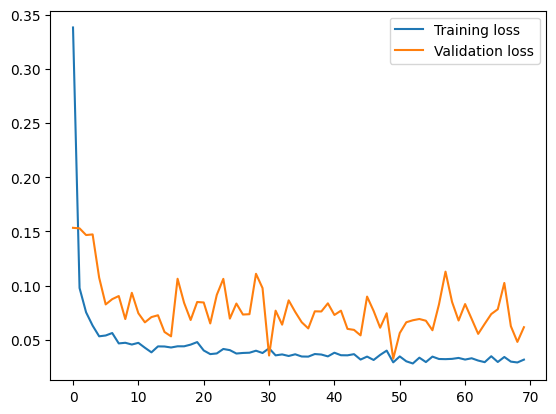

Training loss:  0.03177668899297714
Validation loss:  0.061680715531110764
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


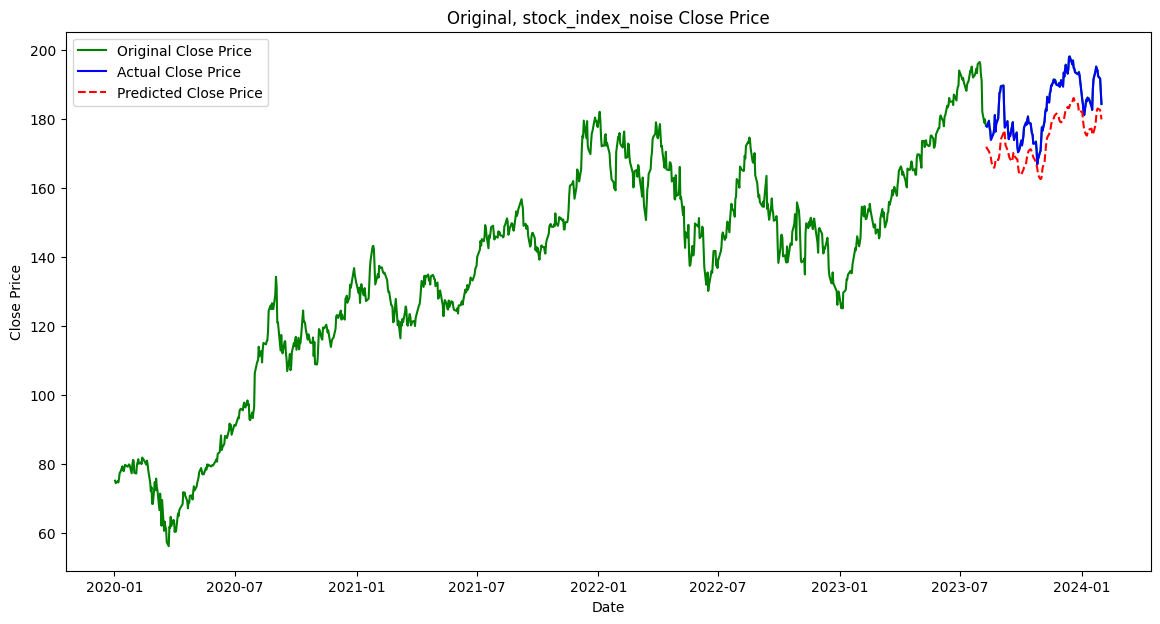

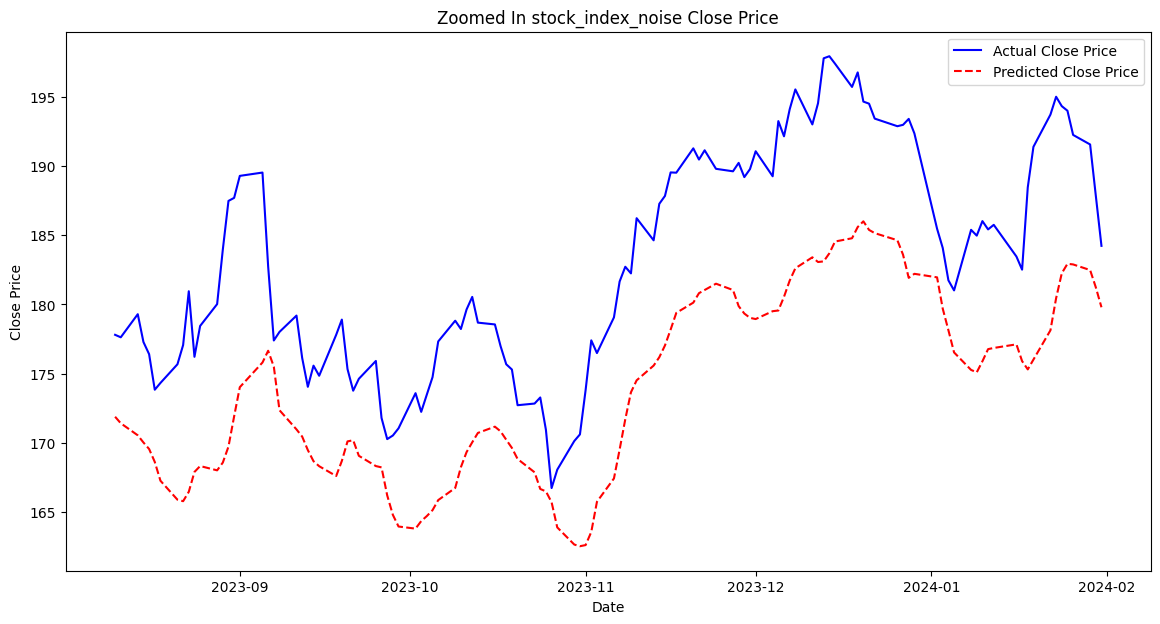

In [17]:
stock_index_noise_lstm = triple_lstm_model(stock_config, X_seq_train_stock, y_seq_train_stock, X_seq_train_index, X_seq_train_noise)
y_pred_index_noise = stock_index_noise_lstm.predict((X_seq_test_stock, X_seq_test_index, X_seq_test_noise))


y_pred_index_noise, y_test_index_noise = unpack_scaled(y_pred_index_noise, y_seq_test_stock, scaler)


visualize(AAPL, y_pred_index_noise, y_test_index_noise, "stock_index_noise")
zoom_visualize(AAPL, y_pred_index_noise, y_test_index_noise, "stock_index_noise")

In [19]:
result.loc['stock+index+noise'] = evaluate_report(y_pred_index_noise, y_test_index_noise)

Mean Squared Error:  94.336
Mean Absolute Percentage Error:  0.05


# Evaluate

In [20]:
result

,MSE,MAPE
stock,18.612135,0.019443
stock+index,45.959568,0.03312
stock+noise,66.46335,0.040354
stock+index+noise,94.335752,0.049522


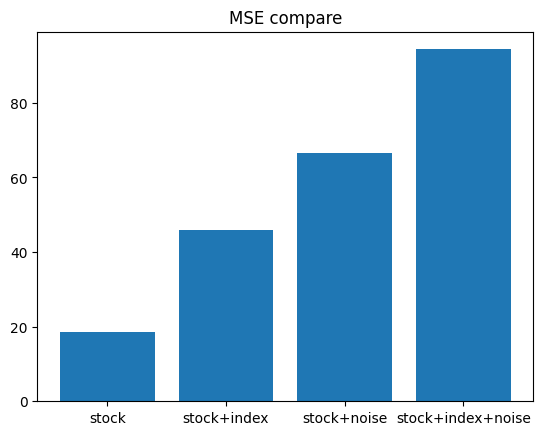

In [21]:
plt.title("MSE compare")
plt.bar(result.index, result['MSE'])
plt.savefig("../figure/MSE_compare")
plt.show()

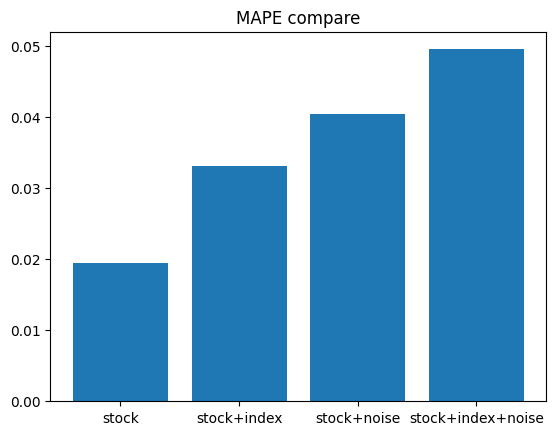

In [22]:
plt.title("MAPE compare")
plt.bar(result.index, result['MAPE'])
plt.savefig("../figure/MAPE_compare")
plt.show()

# ETC

In [23]:
date_range = AAPL['Date'].values[-120:]
date_range = pd.to_datetime(date_range)

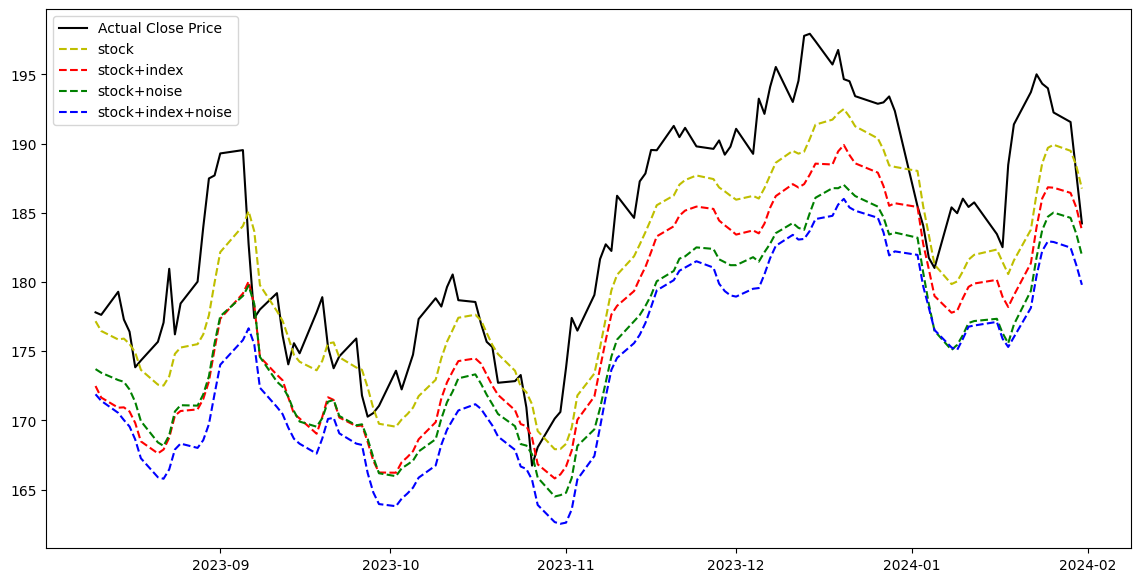

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(date_range, y_test, color='black', label='Actual Close Price')
plt.plot(date_range, y_pred, color='r', linestyle='--', label='stock')
plt.plot(date_range, y_pred_index, color='g', linestyle='--', label='stock+index')
plt.plot(date_range, y_pred_noise, color='b', linestyle='--', label='stock+noise')
plt.plot(date_range, y_pred_index_noise, color='y', linestyle='--', label='stock+index+noise')
plt.legend()
plt.savefig('./figure/All_model_compare.png', dpi=300, pad_inches=0.1, bbox_inches='tight')
plt.show()


# pred vs test Compare

In [ ]:
# pred - 2 timestep ~= test
plt.plot(range(119), y_test[:-1], color='black', label='Actual Close Price')
plt.plot(range(119), y_pred[1:], color='red', linestyle='--', label='Predicted Close Price')
plt.legend()
plt.savefig('./figure/test_pred_compare.png', dpi=300, pad_inches=0.1, bbox_inches='tight')
plt.show()